                                         IMPORTANT
Install python3 version 3.8 or above.

Run this command in the IDE terminal or  command prompt.

pip install -r requirements.txt

Loading the datasets using panda library data manupulation

In [5]:
import pandas as pd

# Load the datasets
movies = pd.read_csv('F:/Movie Rating prediction/Datasets/movies.csv')
ratings = pd.read_csv('F:/Movie Rating prediction/Datasets/ratings.csv')

# Display the first few rows of each dataset
print(movies.head())
print(ratings.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


Data Preprocessing

Clean and preprocess the data, including handling missing values and encoding categorical data.

In [6]:
# Merge datasets on movieId
data = pd.merge(ratings, movies, on='movieId')

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Extract year from title (if present)
data['year'] = data['title'].str.extract(r'\((\d{4})\)').astype(float)

# Fill missing years with median year
data['year'].fillna(data['year'].median(), inplace=True)

# Encode genres using One-Hot Encoding
data = data.join(data['genres'].str.get_dummies(sep='|'))

# Drop irrelevant columns
data.drop(columns=['timestamp', 'title', 'genres'], inplace=True)

# Display the processed dataset
print(data.head())


userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


C:\Users\hiron\AppData\Local\Temp\ipykernel_1664\2952242635.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['year'].fillna(data['year'].median(), inplace=True)


   userId  movieId  rating    year  (no genres listed)  Action  Adventure  \
0       1        1     4.0  1995.0                   0       0          1   
1       1        3     4.0  1995.0                   0       0          0   
2       1        6     4.0  1995.0                   0       1          0   
3       1       47     5.0  1995.0                   0       0          0   
4       1       50     5.0  1995.0                   0       0          0   

   Animation  Children  Comedy  ...  Film-Noir  Horror  IMAX  Musical  \
0          1         1       1  ...          0       0     0        0   
1          0         0       1  ...          0       0     0        0   
2          0         0       0  ...          0       0     0        0   
3          0         0       0  ...          0       0     0        0   
4          0         0       0  ...          0       0     0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0       0         0    0  

Feature Engineering

Create features from movie metadata and user information.

In [7]:
# Select features and target variable
X = data.drop(columns=['rating'])
y = data['rating']

# Display the feature set
print(X.head())


   userId  movieId    year  (no genres listed)  Action  Adventure  Animation  \
0       1        1  1995.0                   0       0          1          1   
1       1        3  1995.0                   0       0          0          0   
2       1        6  1995.0                   0       1          0          0   
3       1       47  1995.0                   0       0          0          0   
4       1       50  1995.0                   0       0          0          0   

   Children  Comedy  Crime  ...  Film-Noir  Horror  IMAX  Musical  Mystery  \
0         1       1      0  ...          0       0     0        0        0   
1         0       1      0  ...          0       0     0        0        0   
2         0       0      1  ...          0       0     0        0        0   
3         0       0      0  ...          0       0     0        0        1   
4         0       0      1  ...          0       0     0        0        1   

   Romance  Sci-Fi  Thriller  War  Western  
0    

Model Training

Split the data into training and testing sets, then train a regression model.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Evaluation

Evaluate the model's performance using appropriate metrics.

In [9]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.0415908833256238
R-squared: 0.05313434675981188


Visualization

Visualize the results to make them understandable.

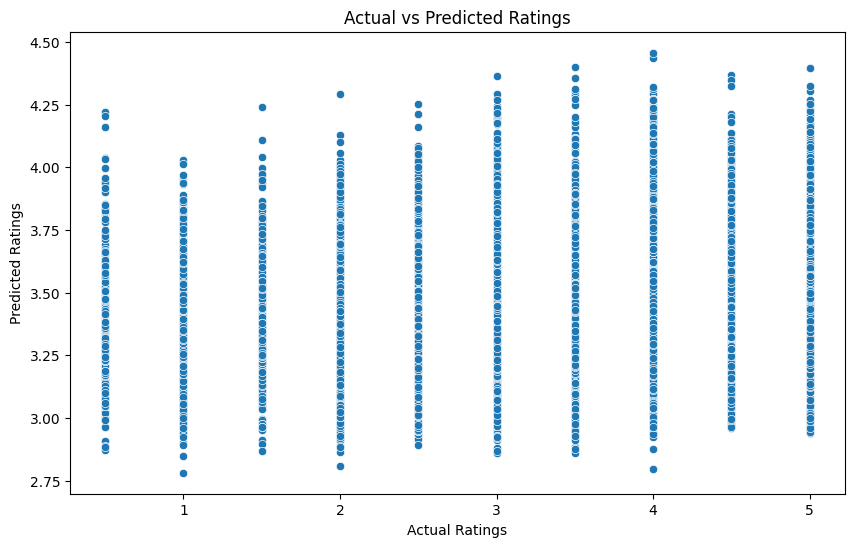

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()
